# EMPLOYEE SALARY PREDICTION USING MACHINE LEARNING

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load the dataset

In [2]:
df = pd.read_csv("Salaries.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,Principal Data Scientist,80000,EUR,85847,ES,100,ES,L
1,2023,MI,CT,ML Engineer,30000,USD,30000,US,100,US,S
2,2023,MI,CT,ML Engineer,25500,USD,25500,US,100,US,S
3,2023,SE,FT,Data Scientist,175000,USD,175000,CA,100,CA,M
4,2023,SE,FT,Data Scientist,120000,USD,120000,CA,100,CA,M


# Data Cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [4]:
df.shape

(3755, 11)

In [5]:
df.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,3755.000000,3.755000e+03,3755.000000,3755.000000
mean,2022.373635,1.906956e+05,137570.389880,46.271638
std,0.691448,6.716765e+05,63055.625278,48.589050
min,2020.000000,6.000000e+03,5132.000000,0.000000
25%,2022.000000,1.000000e+05,95000.000000,0.000000
50%,2022.000000,1.380000e+05,135000.000000,0.000000
75%,2023.000000,1.800000e+05,175000.000000,100.000000
max,2023.000000,3.040000e+07,450000.000000,100.000000


In [6]:
# Check for missing values
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [7]:
df.experience_level.value_counts()

experience_level
SE    2516
MI     805
EN     320
EX     114
Name: count, dtype: int64

In [8]:
df.employment_type.value_counts()

employment_type
FT    3718
PT      17
CT      10
FL      10
Name: count, dtype: int64

In [9]:
df.job_title.value_counts()

job_title
Data Engineer                1040
Data Scientist                840
Data Analyst                  612
Machine Learning Engineer     289
Analytics Engineer            103
                             ... 
Principal Data Architect        1
Head of Machine Learning        1
Cloud Data Architect            1
Staff Data Scientist            1
Finance Data Analyst            1
Name: count, Length: 93, dtype: int64

In [10]:
df['job_title'].unique()

array(['Principal Data Scientist', 'ML Engineer', 'Data Scientist',
       'Applied Scientist', 'Data Analyst', 'Data Modeler',
       'Research Engineer', 'Analytics Engineer',
       'Business Intelligence Engineer', 'Machine Learning Engineer',
       'Data Strategist', 'Data Engineer', 'Computer Vision Engineer',
       'Data Quality Analyst', 'Compliance Data Analyst',
       'Data Architect', 'Applied Machine Learning Engineer',
       'AI Developer', 'Research Scientist', 'Data Analytics Manager',
       'Business Data Analyst', 'Applied Data Scientist',
       'Staff Data Analyst', 'ETL Engineer', 'Data DevOps Engineer',
       'Head of Data', 'Data Science Manager', 'Data Manager',
       'Machine Learning Researcher', 'Big Data Engineer',
       'Data Specialist', 'Lead Data Analyst', 'BI Data Engineer',
       'Director of Data Science', 'Machine Learning Scientist',
       'MLOps Engineer', 'AI Scientist', 'Autonomous Vehicle Technician',
       'Applied Machine Learning Sc

In [11]:
df.salary_currency.value_counts()

salary_currency
USD    3224
EUR     236
GBP     161
INR      60
CAD      25
AUD       9
BRL       6
SGD       6
PLN       5
CHF       4
TRY       3
HUF       3
DKK       3
JPY       3
THB       2
HKD       1
ILS       1
CZK       1
MXN       1
CLP       1
Name: count, dtype: int64

In [12]:
df.employee_residence.value_counts()

employee_residence
US    3004
GB     167
CA      85
ES      80
IN      71
      ... 
RS       1
NZ       1
MD       1
LU       1
MT       1
Name: count, Length: 78, dtype: int64

In [13]:
df.company_location.value_counts()

company_location
US    3040
GB     172
CA      87
ES      77
IN      58
      ... 
CN       1
NZ       1
CL       1
MD       1
MT       1
Name: count, Length: 72, dtype: int64

In [14]:
df.company_size.value_counts()

company_size
M    3153
L     454
S     148
Name: count, dtype: int64

In [15]:
# Drop or fill missing values
df.dropna(inplace=True)

In [16]:
df.drop(columns = ['salary_currency','salary'], inplace = True)

#  Exploratory Data Analysis (EDA)

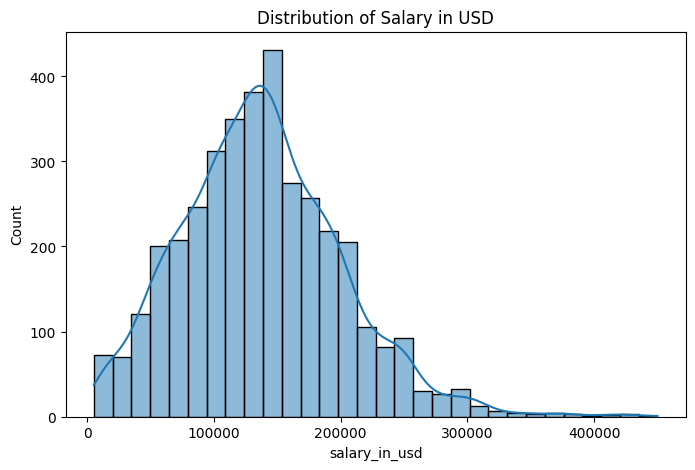

In [17]:
plt.figure(figsize=(8, 5))
sns.histplot(df['salary_in_usd'], kde=True, bins=30)
plt.title("Distribution of Salary in USD")
plt.show()

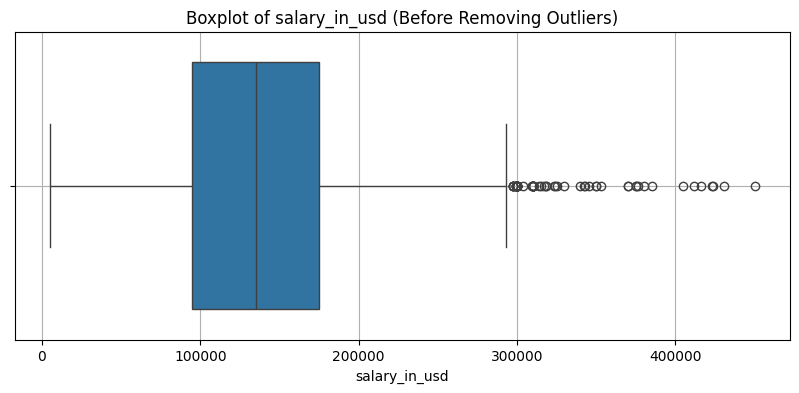

In [18]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Boxplot of salary_in_usd (Before Removing Outliers)")
plt.grid(True)
plt.show()

In [19]:
Q1 = df['salary_in_usd'].quantile(0.25)
Q3 = df['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the dataset
df = df[(df['salary_in_usd'] >= lower_bound) & (df['salary_in_usd'] <= upper_bound)]


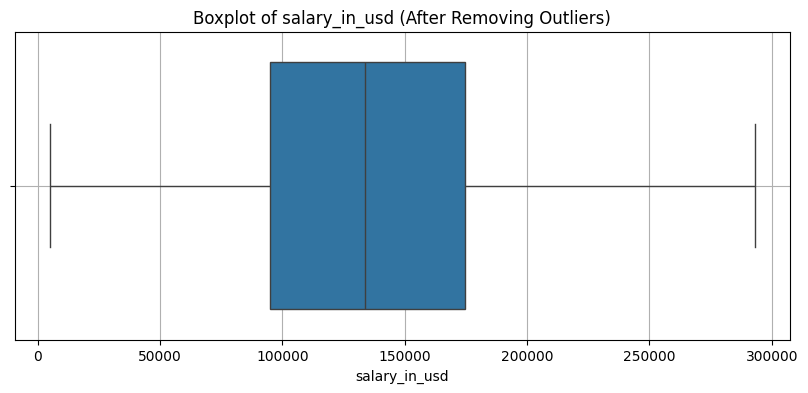

In [20]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['salary_in_usd'])
plt.title("Boxplot of salary_in_usd (After Removing Outliers)")
plt.grid(True)
plt.show()

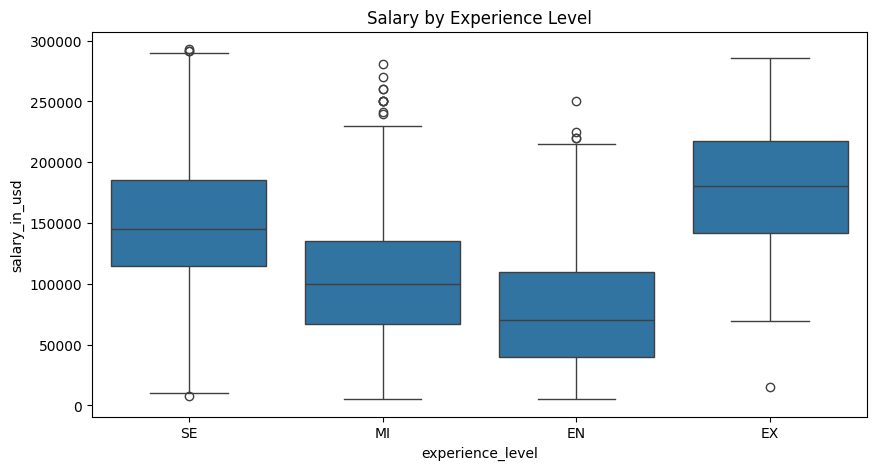

In [21]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='experience_level', y='salary_in_usd', data=df)
plt.title("Salary by Experience Level")
plt.show()

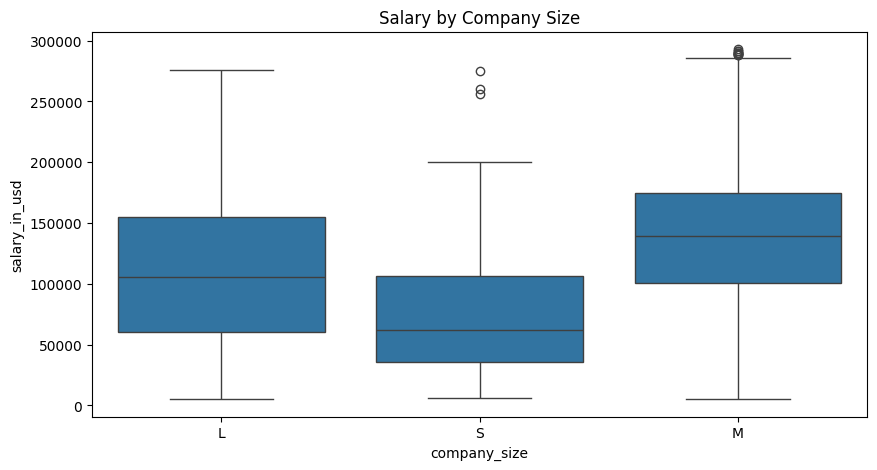

In [22]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='company_size', y='salary_in_usd', data=df)
plt.title("Salary by Company Size")
plt.show()

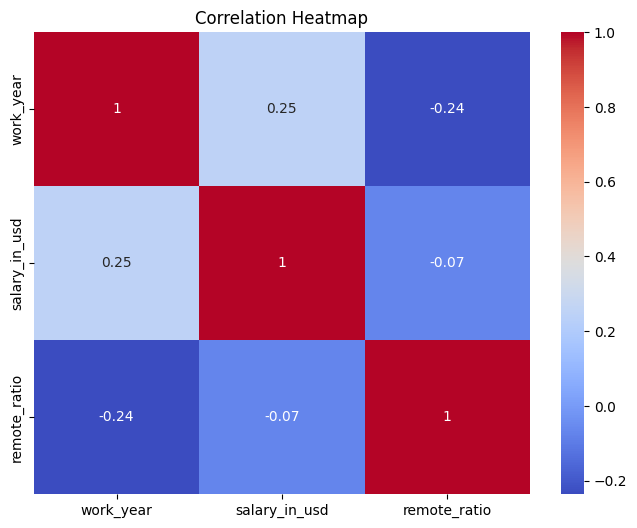

In [23]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Feature Engineering

In [24]:
# one-hot encoding categorical columns.

df = pd.get_dummies(df, drop_first=True)

In [25]:
df.columns

Index(['work_year', 'salary_in_usd', 'remote_ratio', 'experience_level_EX',
       'experience_level_MI', 'experience_level_SE', 'employment_type_FL',
       'employment_type_FT', 'employment_type_PT', 'job_title_AI Developer',
       ...
       'company_location_SG', 'company_location_SI', 'company_location_SK',
       'company_location_TH', 'company_location_TR', 'company_location_UA',
       'company_location_US', 'company_location_VN', 'company_size_M',
       'company_size_S'],
      dtype='object', length=249)

# Train-Test Split

In [26]:
# import ml libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = df.drop(["salary_in_usd"], axis=1) # replace 'Salary' with actual column name
y = df["salary_in_usd"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training & Comparison

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, predictions)
    
    results.append({
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2 Score": r2
    })

results_df = pd.DataFrame(results)
print(results_df.sort_values("R2 Score", ascending=False))


               Model           MAE           MSE          RMSE  R2 Score
3  Gradient Boosting  34151.239997  1.924365e+09  43867.581941  0.440257
0  Linear Regression  34524.572860  1.937861e+09  44021.141402  0.436331
2      Random Forest  34677.525799  2.028706e+09  45041.158252  0.409907
1      Decision Tree  35831.017320  2.207674e+09  46985.895338  0.357850


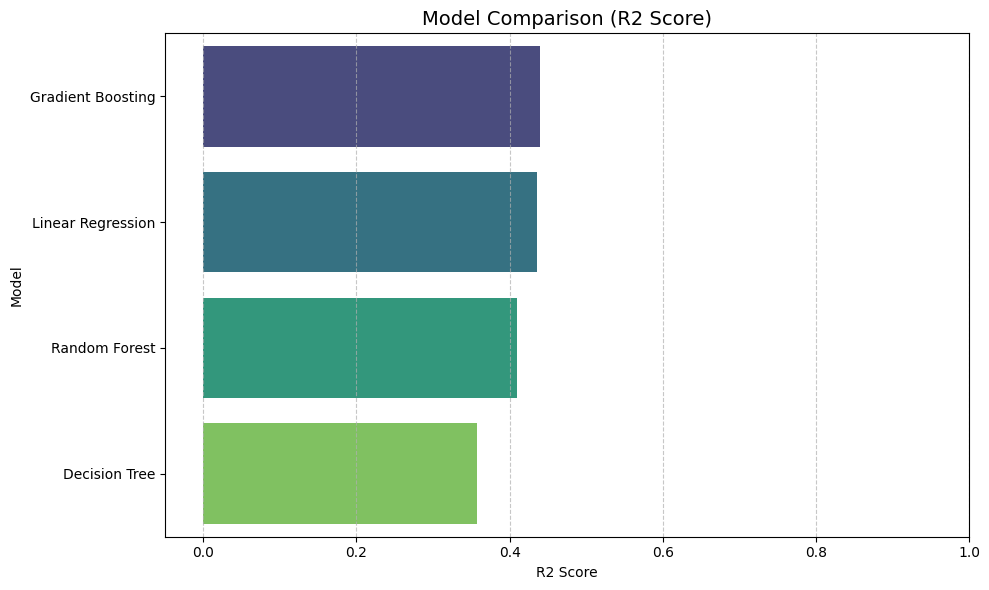

In [28]:
# sort models by R2 Score (highest to lowest)
results_sorted = results_df.sort_values(by="R2 Score", ascending=False)

# Set figure size
plt.figure(figsize=(10, 6))

# Barplot of R2 Score
sns.barplot(x="R2 Score", y="Model", data=results_sorted, palette="viridis")

# Titles and labels
plt.title("Model Comparison (R2 Score)", fontsize=14)
plt.xlabel("R2 Score")
plt.ylabel("Model")
plt.xlim(-0.05, 1.0)  # Adjust axis limits if needed
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


# Model Saving

In [29]:
# Import joblib libraries

import joblib

# Load dataset
df = pd.read_csv("Salaries.csv")
df = df.drop(columns=["salary", "salary_currency"])
X = df.drop("salary_in_usd", axis=1)
y = df["salary_in_usd"]

# One-hot encode
X_encoded = pd.get_dummies(X)

# Train final model
model = GradientBoostingRegressor()
model.fit(X_encoded, y)

# Save model & columns
joblib.dump(model, "model.pkl")
joblib.dump(X_encoded.columns.tolist(), "feature_columns.pkl")

print("✅ Model and feature columns saved.")


✅ Model and feature columns saved.


In [30]:
# Load data

df = pd.read_csv("Salaries.csv")

# Top 20 most common entries
top_jobs = df['job_title'].value_counts().head(20).index.tolist()
top_residence = df['employee_residence'].value_counts().head(20).index.tolist()
top_locations = df['company_location'].value_counts().head(20).index.tolist()

print("Job Titles:", top_jobs)
print("Employee Residences:", top_residence)
print("Company Locations:", top_locations)


Job Titles: ['Data Engineer', 'Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Analytics Engineer', 'Data Architect', 'Research Scientist', 'Applied Scientist', 'Data Science Manager', 'Research Engineer', 'ML Engineer', 'Data Manager', 'Machine Learning Scientist', 'Data Science Consultant', 'Data Analytics Manager', 'Computer Vision Engineer', 'AI Scientist', 'BI Data Analyst', 'Business Data Analyst', 'Data Specialist']
Employee Residences: ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'PT', 'BR', 'GR', 'NL', 'AU', 'MX', 'PK', 'IT', 'IE', 'JP', 'NG', 'AR', 'AT']
Company Locations: ['US', 'GB', 'CA', 'ES', 'IN', 'DE', 'FR', 'BR', 'GR', 'PT', 'AU', 'NL', 'MX', 'IE', 'SG', 'AT', 'JP', 'NG', 'PL', 'CH']
